In [53]:
import os
import matplotlib.pyplot as plt
from kuibit.simdir import SimDir
import kuibit.visualize_matplotlib as viz

datadir = os.environ["HOME"]+"/simulations/tov_ET"
datadir2 = os.environ["HOME"]+"/simulations/tov_ET7"

sim = SimDir(datadir)
sim2 = SimDir(datadir2)

iteration_number = 0
rho = sim.timeseries.maximum['rho']
rho2 = sim2.timeseries.maximum.get('rho')


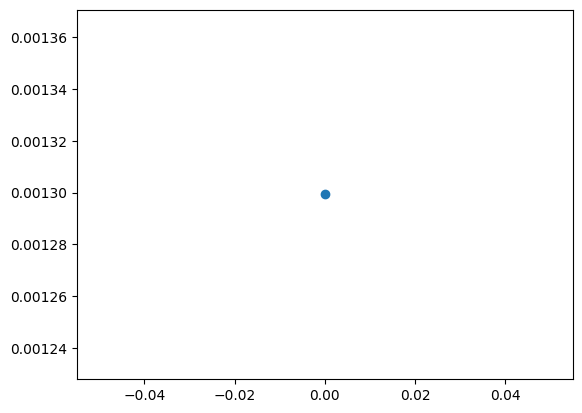

In [54]:
# this cell shows the expected plot using previously stored data
import numpy as np

# reconstruct plot data from saved strings
(quant_diff_s, minval, maxval, delta_t) = \
  ("ff8baee2e5d2ac70320c0007182c404f5b656f7b8897a8bbcddde8eeede8ddcfc0b0a29589817b777473757a8189929ca6b0bac4cbd0d3d4d4d2cfcbc7c2bdb8b4b0adaaa9a8a9abaeb3b8bcc1c5c8cccf",
   1.235e-03, 1.280e-03, 5.000e+00)
quant_diff = np.array(bytearray.fromhex(quant_diff_s))
rec_vals = quant_diff / 255. * (maxval- minval) + minval
rec_time = np.arange(0,len(quant_diff)) * delta_t

# plot them, including your results if you have them
#plt.plot(rec_time, rec_vals/rec_vals[0],
#         label="central density (stored values)")
#plt.plot(rho2/rho2(0), label="central density (your results)")
plt.scatter(rho2.t, rho2.y)


In [57]:
print(rho.y)

[0.00128    0.00127702 0.00127416 0.00127147 0.00126895 0.00126662
 0.00126448 0.00126271 0.00126128 0.00126017 0.00125941 0.00125898
 0.00125886 0.00125904 0.00125948 0.00126016 0.00126102 0.00126204
 0.00126316 0.00126436 0.00126559 0.00126682 0.00126805 0.00126922
 0.00127032 0.00127132 0.00127223 0.00127306 0.00127377 0.00127438
 0.00127487 0.00127527 0.00127558 0.00127578 0.00127589 0.00127593
 0.00127591 0.00127583 0.00127569 0.0012755  0.00127527 0.00127502
 0.00127476 0.00127447 0.00127417 0.00127386 0.00127352 0.00127316
 0.00127277 0.00127236 0.00127192 0.00127146 0.00127095 0.00127039
 0.00126979 0.00126914 0.00126846 0.00126774 0.00126697 0.00126615
 0.00126527 0.00126434 0.00126337 0.00126237 0.00126134 0.00126027
 0.00125917 0.00125803 0.00125688 0.00125572 0.00125457 0.00125341
 0.00125225 0.0012511  0.00124996 0.00124885 0.00124777 0.00124673
 0.00124572 0.00124473 0.00124378 0.00124289 0.00124205 0.00124125
 0.00124049 0.00123978 0.00123911 0.00123851 0.00123795 0.0012